<p><img alt="UN logo" height="80px" src="https://unal.edu.co/typo3conf/ext/unal_skin_default/Resources/Public/images/escudoUnal_black.png" align="right" hspace="0px" vspace="0px"></p>

<H1 align="center">LAB2 Reproduce the “The PyData Toolbox with Scott Sanderson” notebook</H1>
<h3 align="center">Andrés Felipe Jiménez Pérez</h3>
<h3 align="center">2016696 - Algoritmos - Grupo 2</h3>
<h4 align="center">UNIVERSIDAD NACIONAL DE COLOMBIA</h4>
<h3 align="center">Agosto 31, 2020</h3>

El presente notebook es creado por Scott Sanderson (Senior Engineer at Quantopian) y desarrollado bajo las instrucciones del profesor asignado para la asignatura (2016696 - Algoritmos - Grupo 2) por Felipe Jiménez (Computer & Systems Engineer at National University of Colombia).

In [307]:
pip install fortran-magic

In [308]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [309]:
import py_compile as pc

In [310]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/me.jpg?raw=1" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [311]:
assert ran_the_first_cell, "Oh noes!"

In [312]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [313]:
list_1 = ['one', 2, 'three', 4.0, 'five', 6]
list_1

['one', 2, 'three', 4.0, 'five', 6]

In [314]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [315]:
# Lists can be indexed like C-style arrays.
fifth = l[4]
sixth = l[5]
print("fifth:", fifth)
print("sixth:", sixth)

fifth: 5.0
sixth: six


In [316]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [317]:
# Negative indexing gives elements relative to the end of the list.
penultimate = l[-2]
antepenultimate = l[-3]
print("second to last:", penultimate)
print("third to last:", antepenultimate)

second to last: 5.0
third to last: 4


In [318]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [319]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist_1 = l[3:6]
sublist_1

[4, 5.0, 'six']

In [320]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [321]:
# l[:N] is equivalent to l[0:N].
first_four = l[:4]
first_four

[1, 'two', 3.0, 4]

In [322]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [323]:
# l[3:] is equivalent to l[3:len(l)].
after_two = l[2:]
after_two

[3.0, 4, 5.0, 'six']

In [324]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [325]:
# There's also a third parameter, "step", which gets every Nth element.
list_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G','H']
list_1[2:7:3]

['C', 'F']

In [326]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [327]:
# This is a cute way to reverse a list.
list_1[::-1]

['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']

In [328]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [329]:
# Lists can be grown efficiently (in O(1) amortized time).
list_1
print("Before:", list_1)
list_1.append('I')
print("After:", list_1)

Before: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
After: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']


In [330]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [331]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 10 for x in l]

[10, 20, 30, 40, 50]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [332]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [333]:
# Dictionaries are key-value mappings.
animes = {'Death' : 'Note', 'Dragon' : 'Ball', 'Doraemon' :  'Nobita', 'Pokemon' : 'Pika', 'Your' : 'Name'}
animes

{'Death': 'Note',
 'Doraemon': 'Nobita',
 'Dragon': 'Ball',
 'Pokemon': 'Pika',
 'Your': 'Name'}

In [334]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [335]:
animes['Sword Art'] = 'Online'
animes

{'Death': 'Note',
 'Doraemon': 'Nobita',
 'Dragon': 'Ball',
 'Pokemon': 'Pika',
 'Sword Art': 'Online',
 'Your': 'Name'}

In [336]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [337]:
del animes['Dragon']
animes

{'Death': 'Note',
 'Doraemon': 'Nobita',
 'Pokemon': 'Pika',
 'Sword Art': 'Online',
 'Your': 'Name'}

In [338]:
# No slicing.
# philosophers['Bertrand':'Immanuel']

In [339]:
# No slicing.
# animes['Sword Art':'Online']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pacino.gif?raw=1" alt="Drawing" style="width: 100%;"/></center>


In [340]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [341]:
# Suppose we have some matrices...
a_1 = [[1, 2, 3, 40],
     [2, 3, 4, 6],
     [5, 6, 7, 10],
     [1, 1, 1, 1],
     [4, 5, 6, 4]]

b_1 = [[1, 2, 3, 4, 4]]

In [342]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/gross.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>


In [343]:
%%time

matmul(a, b)

CPU times: user 26 µs, sys: 3 µs, total: 29 µs
Wall time: 34.1 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [344]:
%%time

matmul(a_1, b_1)

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 3.2 ms


[[1, 2, 3, 4, 4],
 [2, 4, 6, 8, 8],
 [5, 10, 15, 20, 20],
 [1, 2, 3, 4, 4],
 [4, 8, 12, 16, 16]]

In [345]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.2720555818405641, 0.46311261481755983, 0.049504615210028136],
 [0.9910810240198232, 0.46857752060023394, 0.7904769581021399]]

In [346]:
randm_1 = random_matrix(3, 2) 
randm_1

[[0.7974605707184103, 0.20925628999266266],
 [0.871191948833968, 0.4255694696928244],
 [0.3377065081470071, 0.3664520871444762]]

In [347]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.2 s, sys: 13.1 ms, total: 5.21 s
Wall time: 5.22 s


In [348]:
%%time
randa_1 = random_matrix(900, 100)
randb_1 = random_matrix(100, 900)
x_1 = matmul(randa_1, randb_1)

CPU times: user 11.7 s, sys: 17.1 ms, total: 11.7 s
Wall time: 11.7 s


In [349]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [350]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [351]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [352]:
list_data_1 = [float(i) for i in range(2000)]
array_data_1 = np.array(list_data_1)

In [353]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.1 ms, sys: 98 µs, total: 12.2 ms
Wall time: 16.1 ms


333328333350000.0

In [354]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 171 µs, sys: 0 ns, total: 171 µs
Wall time: 204 µs


333328333350000.0

In [355]:
%%time
python_dot_product(list_data_1, list_data_1)

CPU times: user 269 µs, sys: 0 ns, total: 269 µs
Wall time: 275 µs


2664667000.0

In [356]:
%%time
fortran_dot_product(array_data_1, array_data_1)

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 12.6 µs


2664667000.0

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/sloth.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [357]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [358]:
mul_elemwise([1, 9, 7, 5], [1, 2 + 3j, 3.0, 'five'])
#[type(x) for x in _]

[1, (18+27j), 21.0, 'fivefivefivefivefive']

In [359]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [360]:
# Interpretation overhead.
source_code_1 = 'x + y * z'
bytecode = compile(source_code_1, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (x)
              2 LOAD_NAME                1 (y)
              4 LOAD_NAME                2 (z)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/runaway.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/thisisfine.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [361]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [362]:
data_1 = np.array([10, 9, 8, 7])
data_1

array([10,  9,  8,  7])

In [363]:
data + data

array([2, 4, 6, 8])

In [364]:
data_1 + data_1

array([20, 18, 16, 14])

In [365]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 590 µs, sys: 53 µs, total: 643 µs
Wall time: 1.15 ms


333328333350000.0

In [366]:
%%time
# Naive dot product
(array_data_1 * array_data_1).sum()

CPU times: user 73 µs, sys: 0 ns, total: 73 µs
Wall time: 76.5 µs


2664667000.0

In [367]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 100 µs, sys: 4.03 ms, total: 4.12 ms
Wall time: 4.61 ms


333328333350000.0

In [368]:
%%time
# Built-in dot product.
array_data_1.dot(array_data_1)

CPU times: user 13 µs, sys: 1 µs, total: 14 µs
Wall time: 17.9 µs


2664667000.0

In [369]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 147 µs, sys: 13 µs, total: 160 µs
Wall time: 168 µs


333328333350000.0

In [370]:
%%time
fortran_dot_product(array_data_1, array_data_1)

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 11.9 µs


2664667000.0

In [371]:
# Numpy won't allow us to write a string into an int array.
# data[0] = "foo"

In [372]:
# Numpy won't allow us to write a string into an int array.
# data_1[0] = "nope"

In [373]:
# We also can't grow an array once it's created.
# data.append(3)

In [374]:
# We also can't grow an array once it's created.
# data_1.append(4)

In [375]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [376]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [377]:
arr_1 = np.array([10, 9, 8, 7, 6, 5], dtype='int16').reshape(3, 2)
print("Array:\n", arr_1, sep='')
print("===========")
print("DType:", arr_1.dtype)
print("Shape:", arr_1.shape)
print("Strides:", arr_1.strides)
print("Data:", arr_1.data.tobytes())

Array:
[[10  9]
 [ 8  7]
 [ 6  5]]
DType: int16
Shape: (3, 2)
Strides: (4, 2)
Data: b'\n\x00\t\x00\x08\x00\x07\x00\x06\x00\x05\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [378]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [379]:
data_1 = np.arange(20).reshape(5, 4)
data_1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [380]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [381]:
# Binary operators.
data_1 * data_1

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121],
       [144, 169, 196, 225],
       [256, 289, 324, 361]])

In [382]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [383]:
# Unary functions.
np.sqrt(data_1)

array([[0.        , 1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974, 2.64575131],
       [2.82842712, 3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739, 3.87298335],
       [4.        , 4.12310563, 4.24264069, 4.35889894]])

In [384]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [385]:
# Comparison operations
(data_1 % 2) == 0

array([[ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False]])

In [386]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [387]:
# Boolean combinators.
((data_1 % 2) == 0) & ((data_1 % 5) == 0)

array([[ True, False, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False],
       [False, False, False, False]])

In [388]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [389]:
# as of python 3.5, @ is matrix-multiply
data_1 @ data_1.T

array([[  14,   38,   62,   86,  110],
       [  38,  126,  214,  302,  390],
       [  62,  214,  366,  518,  670],
       [  86,  302,  518,  734,  950],
       [ 110,  390,  670,  950, 1230]])

In [390]:
data_1.dot(data_1.T)

array([[  14,   38,   62,   86,  110],
       [  38,  126,  214,  302,  390],
       [  62,  214,  366,  518,  670],
       [  86,  302,  518,  734,  950],
       [ 110,  390,  670,  950, 1230]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [391]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [392]:
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
cosines

array([ 1.        ,  0.93975313,  0.76627189,  0.50045969,  0.17434523,
       -0.17277674, -0.4990802 , -0.76524761, -0.93920748, -0.99999873])

In [393]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [394]:
# Slicing works with the same semantics as Python lists.
cosines[0]

1.0

In [395]:
sines[:3]  # First three elements (0 to 3)   

array([0.        , 0.34185385, 0.64251645])

In [396]:
cosines[:3]  # First three elements (0 to 3)   

array([1.        , 0.93975313, 0.76627189])

In [397]:
sines[5:]  # Elements from 5 on. (5 to len())

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [398]:
cosines[5:]  # Elements from 5 on. (5 to len())

array([-0.17277674, -0.4990802 , -0.76524761, -0.93920748, -0.99999873])

In [399]:
sines[::2]  # Every other element. (start : end : steps)

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [400]:
cosines[::2]  # Every other element. (start : end : steps)

array([ 1.        ,  0.76627189,  0.17434523, -0.4990802 , -0.93920748])

In [401]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [402]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("cosines:\n", cosines)
print("cosines < 0.5:\n", cosines < 0.5)
print("cosines[cosines > 0.5]:\n", cosines[cosines < 0.5])

cosines:
 [ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]
cosines < 0.5:
 [False False False False  True  True  True  True  True  True]
cosines[cosines > 0.5]:
 [ 0.17434523 -0.17277674 -0.4990802  -0.76524761 -0.93920748 -0.99999873]


In [403]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [404]:
# We index with lists/arrays of integers to select values at those indices.
print(cosines)
cosines[[0, 4, 7]]

[ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]


array([ 1.        ,  0.17434523, -0.76524761])

In [405]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [406]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data_1 = np.array([0, 7, 9, 1, -41, 1, 7])

In [407]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [408]:
sort_indices_1 = np.argsort(unsorted_data_1)
sort_indices_1

array([4, 0, 3, 5, 1, 6, 2])

In [409]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [410]:
unsorted_data_1[sort_indices_1]

array([-41,   0,   1,   1,   7,   7,   9])

In [411]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [412]:
market_caps_1 = np.array([400, 56, 30, 41, 1])  # Presumably in dollars?
assets_1 = np.array(['TSLA', 'MSFT', 'AMZN', 'FB', '3M'])

In [413]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [414]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap_1 = np.argsort(market_caps_1)
assets_1[sort_by_mcap_1]

array(['3M', 'AMZN', 'FB', 'MSFT', 'TSLA'], dtype='<U4')

In [415]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [416]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [417]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [418]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [419]:
data_1 = np.arange(16).reshape(4, 4)
data_1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [420]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [421]:
data_1[:3, :3]  # First three rows and first three columns.

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [422]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [423]:
data_1[:3, [0, -1]]  # First three rows, first and last columns.

array([[ 0,  3],
       [ 4,  7],
       [ 8, 11]])

In [424]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [425]:
data[(data[:, 0] % 3) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19]])

In [426]:
data[(data[:, 0] % 5) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [427]:
data_1[:,(data_1[0, :] % 2) == 0]  # Columns where the first row is multiple of 5.

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

In [428]:
data_1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [429]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [430]:
variance(np.random.standard_normal(1000))

1.0299105163000386

In [431]:
variance(np.random.standard_normal(100000))

1.0028236912938788

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [432]:
data = np.arange(30)
data.mean()

14.5

In [433]:
data_1 = np.arange(60)
print(data_1.mean())
print(data_1)

29.5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


- ...but we can do more interesting things with multi-dimensional arrays.

In [434]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [435]:
data_1 = np.arange(60).reshape(20, 3)
data_1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29],
       [30, 31, 32],
       [33, 34, 35],
       [36, 37, 38],
       [39, 40, 41],
       [42, 43, 44],
       [45, 46, 47],
       [48, 49, 50],
       [51, 52, 53],
       [54, 55, 56],
       [57, 58, 59]])

In [436]:
data.mean()

14.5

In [437]:
data_1.mean()

29.5

In [438]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [439]:
data_1.mean(axis=0)

array([28.5, 29.5, 30.5])

In [440]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [441]:
data_1.mean(axis=1)

array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31., 34., 37.,
       40., 43., 46., 49., 52., 55., 58.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [442]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [443]:
row_1 = np.array([10, 9, 8, 7])
column_1 = np.array([[3], [6], [73]]) # se separa por columnas
print("Row:\n", row_1, sep='')
print("Column:\n", column_1, sep='')

Row:
[10  9  8  7]
Column:
[[ 3]
 [ 6]
 [73]]


In [444]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [445]:
row_1 + column_1 # 1er elemento fila + 1er elemento columna, 1er elemento fila + 2dp elemento columna

array([[13, 12, 11, 10],
       [16, 15, 14, 13],
       [83, 82, 81, 80]])

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/broadcasting.png?raw=1" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [446]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [447]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data_1, sep='')
print("Mean:\n", data_1.mean(axis=0), sep='')
print("Data - Mean:\n", data_1 - data_1.mean(axis=0), sep='')

Data:
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]
 [30 31 32]
 [33 34 35]
 [36 37 38]
 [39 40 41]
 [42 43 44]
 [45 46 47]
 [48 49 50]
 [51 52 53]
 [54 55 56]
 [57 58 59]]
Mean:
[28.5 29.5 30.5]
Data - Mean:
[[-28.5 -28.5 -28.5]
 [-25.5 -25.5 -25.5]
 [-22.5 -22.5 -22.5]
 [-19.5 -19.5 -19.5]
 [-16.5 -16.5 -16.5]
 [-13.5 -13.5 -13.5]
 [-10.5 -10.5 -10.5]
 [ -7.5  -7.5  -7.5]
 [ -4.5  -4.5  -4.5]
 [ -1.5  -1.5  -1.5]
 [  1.5   1.5   1.5]
 [  4.5   4.5   4.5]
 [  7.5   7.5   7.5]
 [ 10.5  10.5  10.5]
 [ 13.5  13.5  13.5]
 [ 16.5  16.5  16.5]
 [ 19.5  19.5  19.5]
 [ 22.5  22.5  22.5]
 [ 25.5  25.5  25.5]
 [ 28.5  28.5  28.5]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/unicorn.jpg?raw=1" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/panda-wrangling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pandas_logo.png?raw=1" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [448]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [449]:
s_1 = pd.Series(index=['s', 'e', 'x', 'y', 't'], data=[2, 4, 3, 7, 9])
s_1

s    2
e    4
x    3
y    7
t    9
dtype: int64

In [450]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [451]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s_1.index)
print("The values are:", s_1.values)

The index is: Index(['s', 'e', 'x', 'y', 't'], dtype='object')
The values are: [2 4 3 7 9]


In [452]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [453]:
# We can look up values out of a Series by position...
s_1.iloc[0]

2

In [454]:
# ... or by label.
s.loc['a']

1

In [455]:
# ... or by label.
s_1.loc['s']

2

In [456]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [457]:
# Slicing works as expected...
s_1.iloc[:4] # from the start to position 2 (excluding)

s    2
e    4
x    3
y    7
dtype: int64

In [458]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [459]:
# ...but it works with labels too!
s_1.loc[:'y']

s    2
e    4
x    3
y    7
dtype: int64

In [460]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [461]:
# Fancy indexing works the same as in numpy.
s_1.iloc[[0, -1, 1]]

s    2
t    9
e    4
dtype: int64

In [462]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [463]:
# As does boolean masking.
s_1.loc[s_1 > 3]

e    4
y    7
t    9
dtype: int64

In [464]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [465]:
# Element-wise operations are aligned by index.
other_s_1 = pd.Series({'s': 30.0, 'c': 12.0, 'e': 24.0, 'y': 60.0})
other_s_1

s    30.0
c    12.0
e    24.0
y    60.0
dtype: float64

In [466]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [467]:
s_1 + other_s_1

c     NaN
e    28.0
s    32.0
t     NaN
x     NaN
y    67.0
dtype: float64

In [468]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [469]:
# We can fill in missing values with fillna().
(s_1 + other_s_1).fillna(0.0)

c     0.0
e    28.0
s    32.0
t     0.0
x     0.0
y    67.0
dtype: float64

In [470]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [471]:
# Most real datasets are read in from an external file format.
aapl_1 = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Close')
aapl_1.head()

,Date,Adj Close,High,Low,Open,Volume
Close,,,,,,
30.572857,2010-01-04,27.613066,30.642857,30.340000,30.490000,123432400.0
30.625713,2010-01-05,27.660807,30.798571,30.464285,30.657143,150476200.0
30.138571,2010-01-06,27.220825,30.747143,30.107143,30.625713,138040000.0
30.082857,2010-01-07,27.170504,30.285715,29.864286,30.250000,119282800.0
30.282858,2010-01-08,27.351143,30.285715,29.865715,30.042856,111902700.0


In [472]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [473]:
# Slicing generalizes to two dimensions as you'd expect:
aapl_1.iloc[:1,:1]

,Date
Close,
30.572857,2010-01-04


In [474]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [475]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Open', 'Close']]

,Open,Close
Date,,
2010-02-01,27.481428,27.818571
2010-02-02,27.987143,27.980000
2010-02-03,27.881428,28.461428
2010-02-04,28.104286,27.435715


# Rolling Operations

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/rolling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

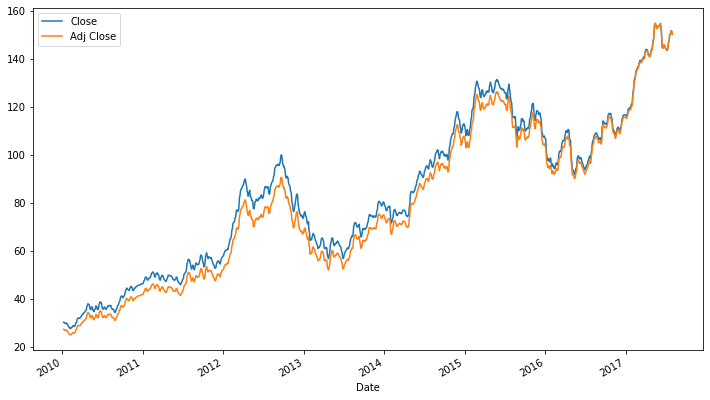

In [476]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

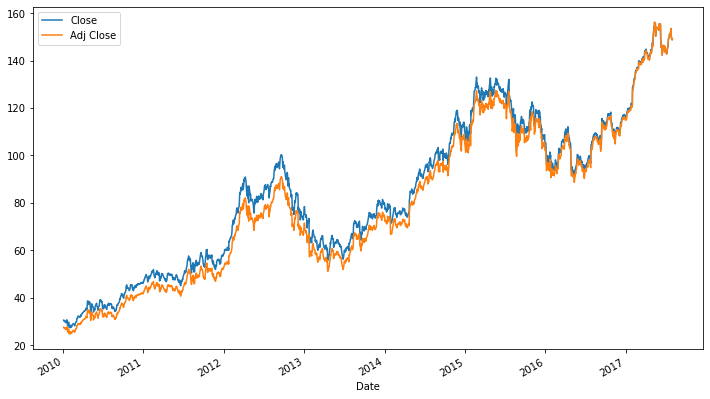

In [477]:
aapl.rolling(1)[['Close', 'Adj Close']].mean().plot();

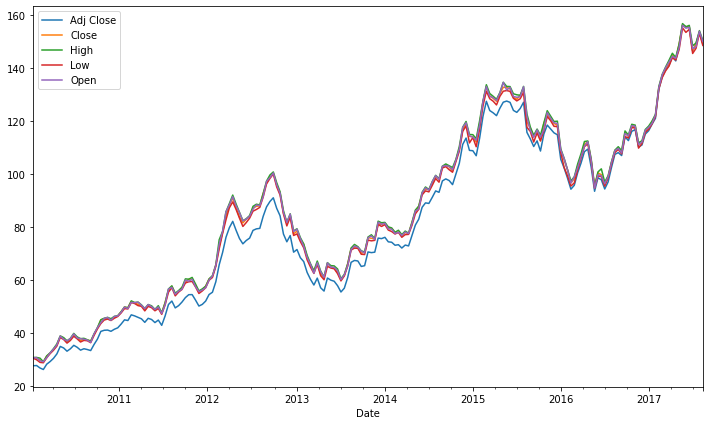

In [478]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

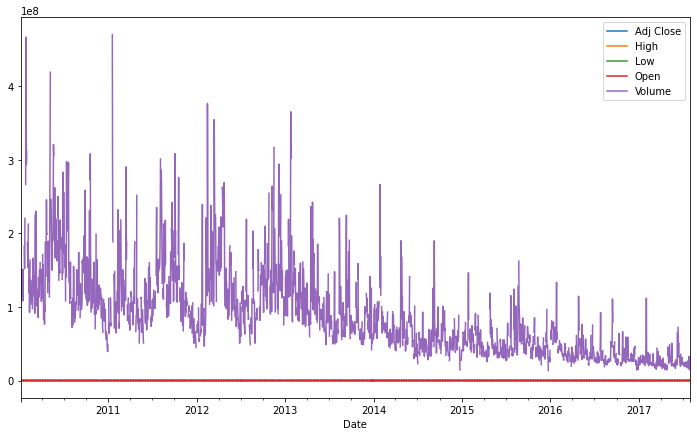

In [479]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Close', axis=1).resample('1D').max().plot();

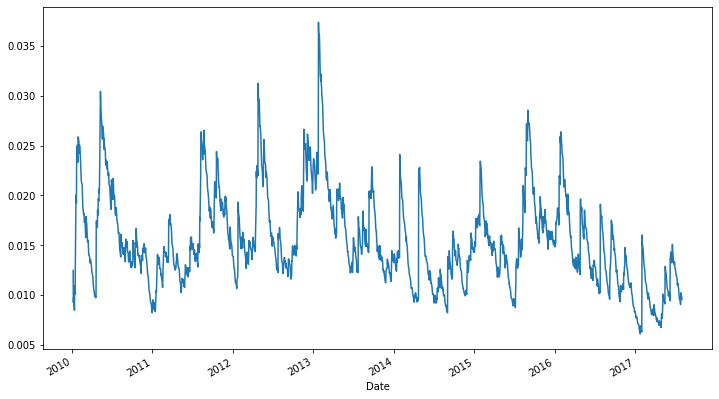

In [480]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

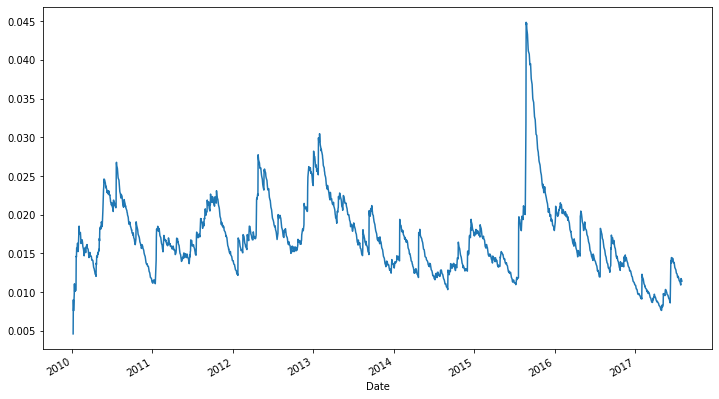

In [481]:
# 60-day rolling exponentially-weighted stddev of returns.
aapl['Open'].pct_change().ewm(span=60).std().plot();

# "Real World" Data

In [482]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [483]:
avocados_1 = read_avocadata('2016', '2020')
avocados_1.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [484]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [485]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados_1.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

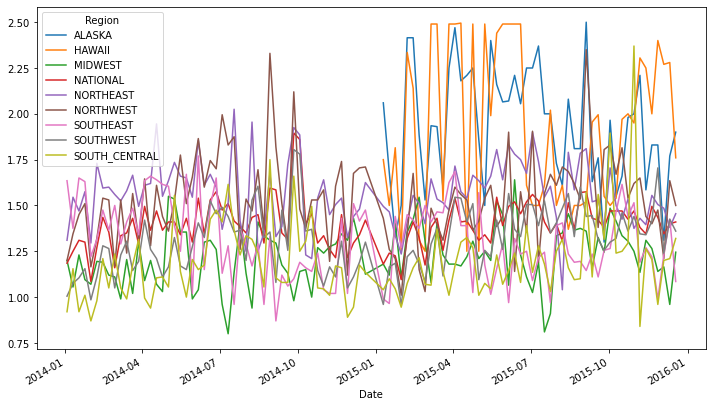

In [486]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

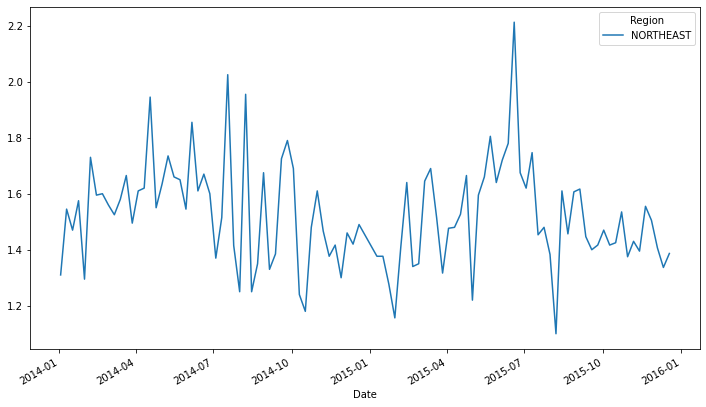

In [487]:
# What's the regional average price of a HASS avocado every day?
region = avocados[avocados.Region == 'NORTHEAST']
region.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [488]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

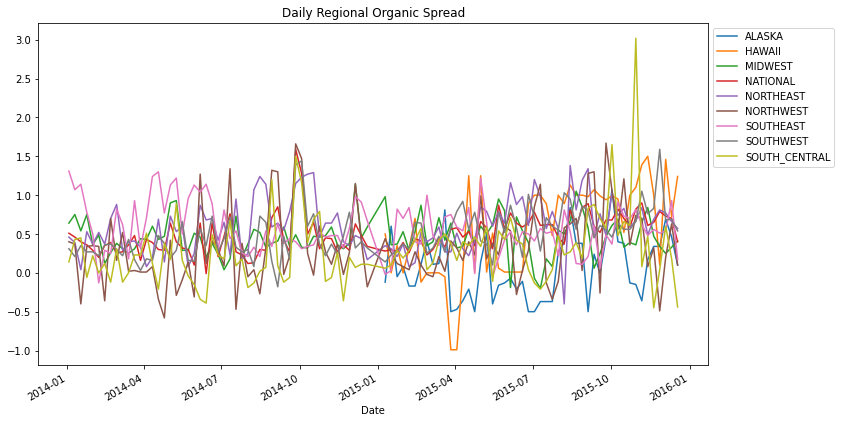

In [489]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

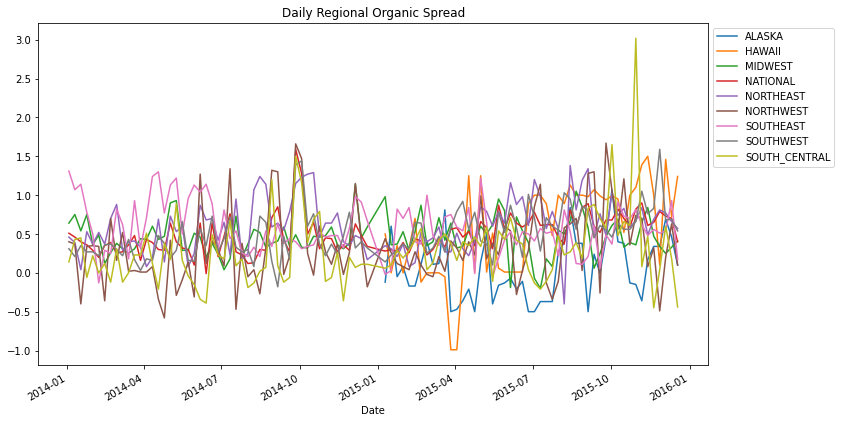

In [490]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [491]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [492]:
spread_correlation_1 = organic_spread_by_region(hass).corr()
spread_correlation_1

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


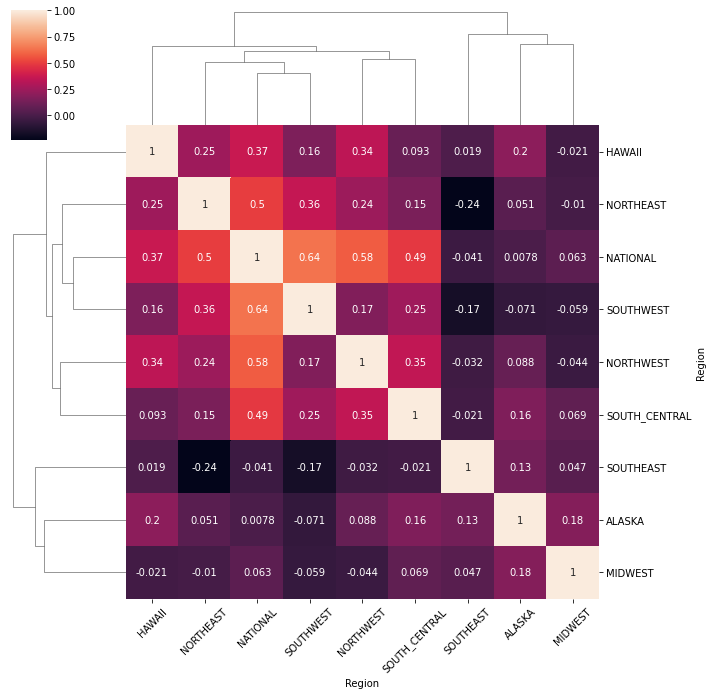

In [493]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

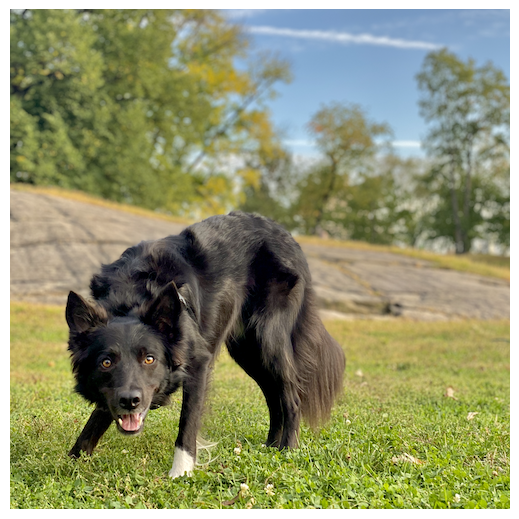

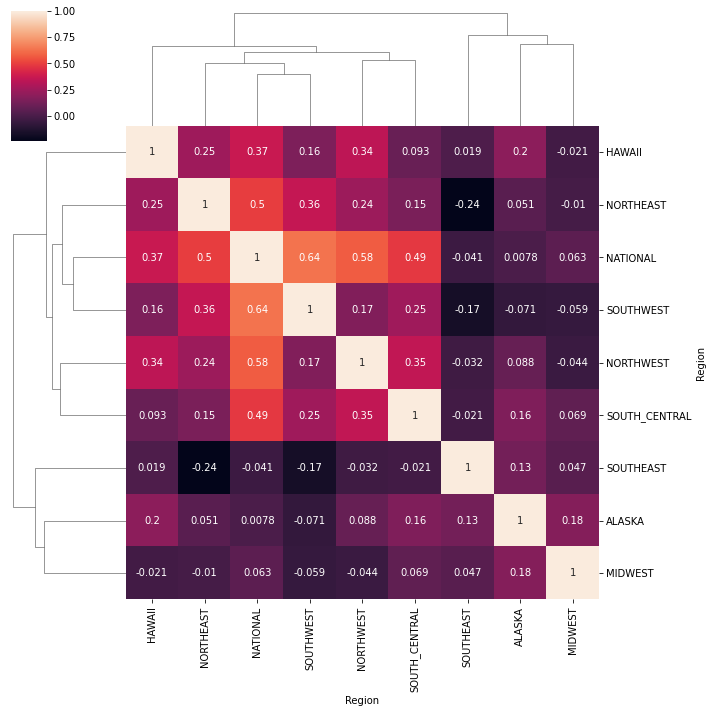

In [495]:
sns.dogplot()

grid = sns.clustermap(spread_correlation, annot=False)
fig = grid.fig
axes = fig.axes
ax = axes[3]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!